<a href="https://colab.research.google.com/github/AshwiniRamesh27/Employee-Attrition-rate/blob/main/Employee_Atrrition(updated)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv('/content/Employee-Attrition.csv')
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
column_names = df.columns.tolist()
print(column_names)
df.shape

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


(1470, 35)

In [ ]:
import pandas as pd

# Reload the original data
file_path = '/content/Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Re-apply preprocessing steps (including renaming and encoding)
df.rename(columns={
    'Age': 'age',
    'Attrition': 'attrition',
    'BusinessTravel': 'travel',
    'DailyRate': 'daily_rate',
    'Department': 'dept',
    'DistanceFromHome': 'distance',
    'Education': 'education',
    'EducationField': 'edu_field',
    'EmployeeCount': 'emp_count',
    'EmployeeNumber': 'emp_id',
    'EnvironmentSatisfaction': 'env_sat',
    'Gender': 'gender',
    'HourlyRate': 'hourly_rate',
    'JobInvolvement': 'job_involve',
    'JobLevel': 'job_level',
    'JobRole': 'job_role',
    'JobSatisfaction': 'job_sat',
    'MaritalStatus': 'marital',
    'MonthlyIncome': 'income',
    'MonthlyRate': 'monthly_rate',
    'NumCompaniesWorked': 'num_companies',
    'Over18': 'over_18',
    'OverTime': 'overtime',
    'PercentSalaryHike': 'salary_hike',
    'PerformanceRating': 'performance',
    'RelationshipSatisfaction': 'relation_sat',
    'StandardHours': 'std_hours',
    'StockOptionLevel': 'stock_lvl',
    'TotalWorkingYears': 'work_years',
    'TrainingTimesLastYear': 'train_times',
    'WorkLifeBalance': 'work_balance',
    'YearsAtCompany': 'yrs_company',
    'YearsInCurrentRole': 'yrs_role',
    'YearsSinceLastPromotion': 'yrs_promo',
    'YearsWithCurrManager': 'yrs_manager'
}, inplace=True)

df = pd.get_dummies(df, columns=['travel', 'dept'], prefix=['travel', 'dept'])
df = pd.get_dummies(df, columns=['job_role'], prefix=['job_role'],drop_first=True)
df = pd.get_dummies(df, columns=['edu_field'], prefix=['edu_field'],drop_first=True)
df['marital'] = df['marital'].replace({'Divorced': 'Single'})
df['attrition'] = df['attrition'].map({'Yes': True, 'No': False})
df['gender'] = df['gender'].map({'Female': True, 'Male': False})
df['marital'] = df['marital'].map({'Single': True, 'Married': False})
df['overtime'] = df['overtime'].map({'Yes': True, 'No': False})
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [ ]:
df.to_csv('job satisfaction.csv', index=False) #for next problem

In [ ]:
df['satisfaction_sum'] = df['env_sat'] + df['relation_sat']
df.drop(['env_sat', 'relation_sat'], axis=1, inplace=True)
df.head()
df.shape

(1470, 49)

In [ ]:
df['satisfaction_sum'] = df['env_sat'] + df['relation_sat']
df.drop(['env_sat', 'relation_sat'], axis=1, inplace=True)


In [ ]:
# Drop unwanted columns if they exist
columns_to_drop = ['emp_count', 'std_hours', 'over_18', 'daily_rate', 'hourly_rate', 'monthly_rate']
df.drop(columns_to_drop, axis=1, inplace=True)
display(df.head())
df.shape()

KeyError: "['emp_count', 'std_hours', 'over_18', 'daily_rate', 'hourly_rate', 'monthly_rate'] not found in axis"

In [ ]:
df.shape

(1470, 43)

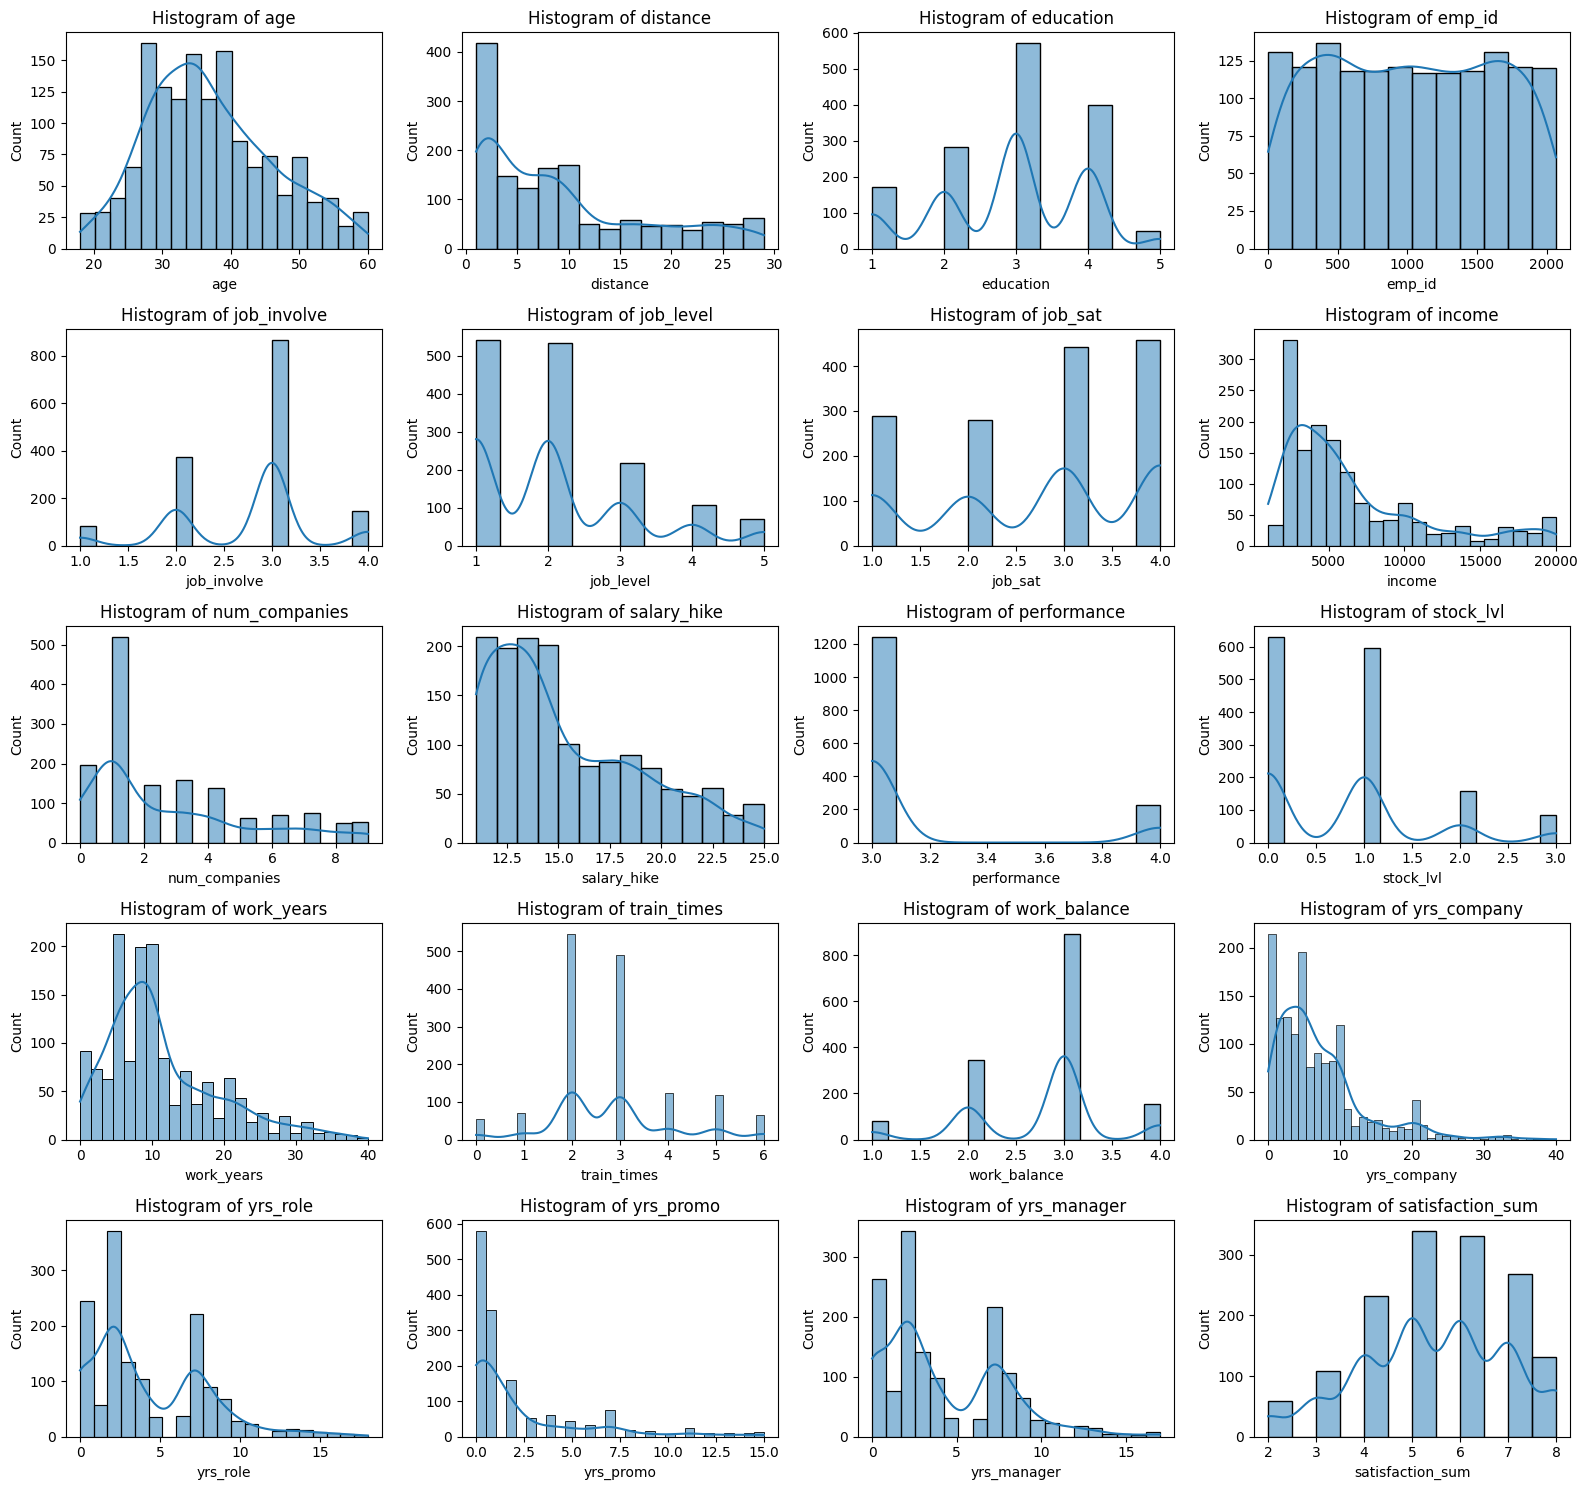

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Filter out columns that only have 0 and 1 values
numerical_cols = [col for col in numerical_cols if not df[col].dropna().isin([0, 1]).all()]

# Determine the number of rows and columns for subplots
n_cols = 4  # You can adjust the number of columns
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Iterate through each numerical column and create a histogram in a subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)  # Added kde for density curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


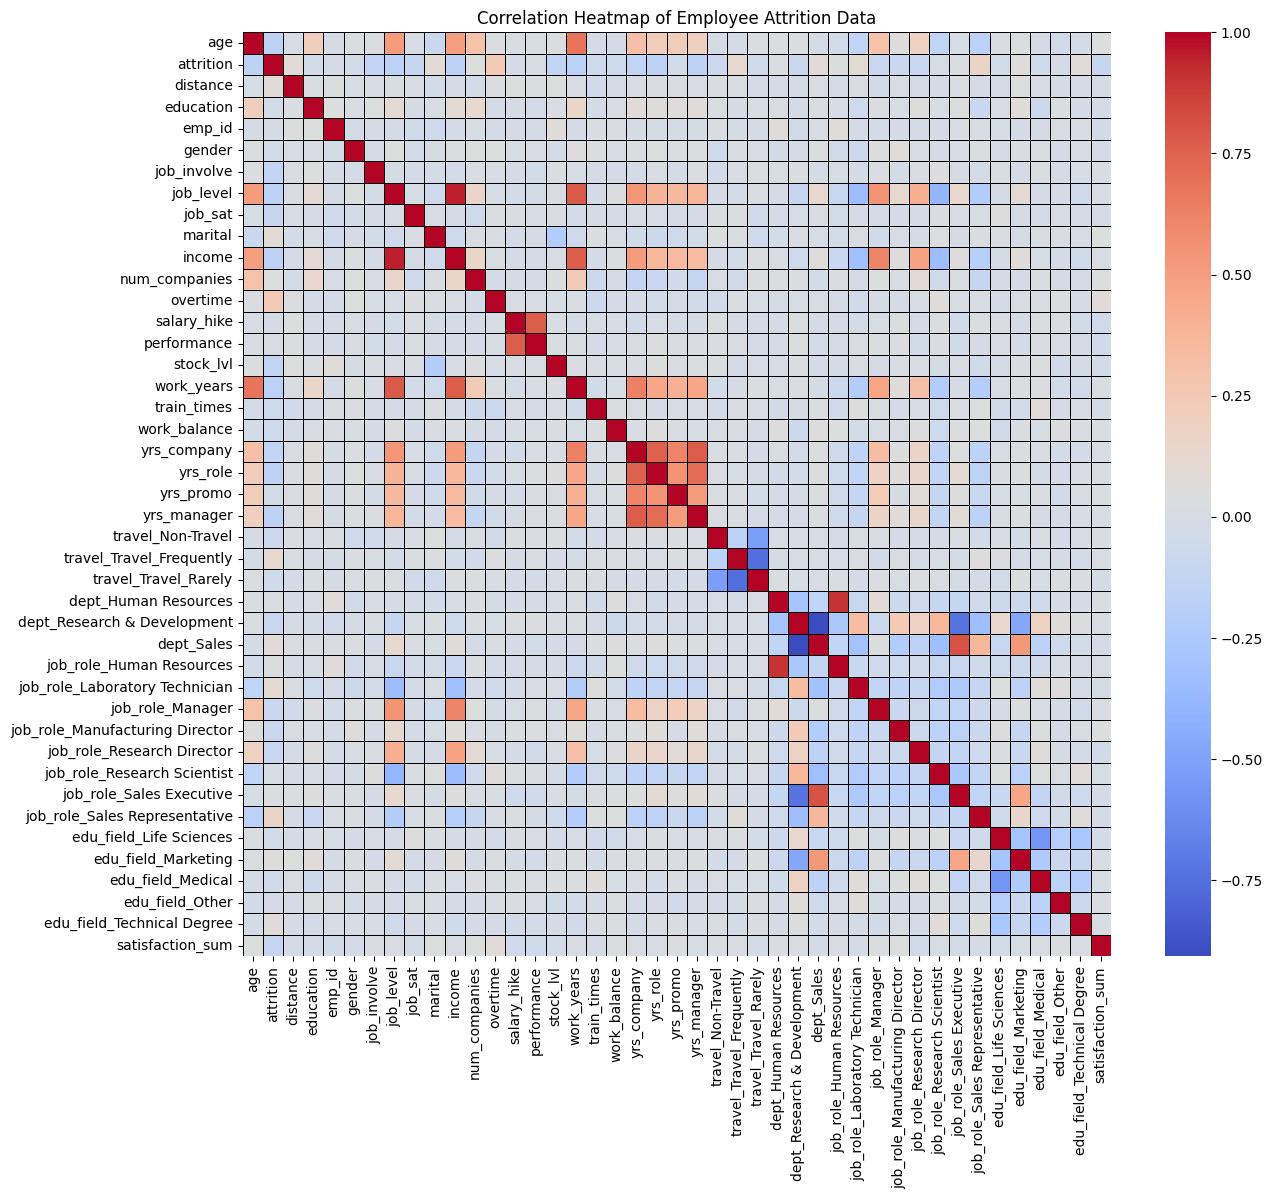

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14,12
))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=.5, linecolor='black')
plt.title('Correlation Heatmap of Employee Attrition Data')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Suppose your dataframe is df
# 'attrition' looks like your target variable

# Drop rows where 'attrition' is NaN
df.dropna(subset=['attrition'], inplace=True)

y = df['attrition']
X = df.drop(columns=['attrition'])

# Train-test split (80% train, 20% test for example)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1176, 42) (1176,)
Test shape: (294, 42) (294,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Suppose your dataframe is df
y = df['attrition']
X = df.drop(columns=['attrition'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For AUC

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Convert results into a dataframe for easy comparison
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.741497   0.337079  0.638298  0.441176  0.767508
1        Random Forest  0.846939   0.625000  0.106383  0.181818  0.764062
2              XGBoost  0.857143   0.608696  0.297872  0.400000  0.775864


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:02:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define models and hyperparameter grids
param_grids = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, class_weight='balanced'),
        {
            "C": [0.01, 0.1, 1, 10],  # Regularization strength
            "solver": ["liblinear", "lbfgs"]
        }
    ),

    "Random Forest": (
        RandomForestClassifier(class_weight='balanced', random_state=42),
        {
            "n_estimators": [100, 200, 500],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    ),

    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        {
            "n_estimators": [100, 200, 500],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "subsample": [0.7, 0.8, 1.0],
            "colsample_bytree": [0.7, 0.8, 1.0],
            "scale_pos_weight": [1, 2, 5]  # imbalance handling
        }
    )
}


In [ ]:
best_models = {}
results = []

for name, (model, params) in param_grids.items():
    print(f"🔍 Tuning {name}...")

    search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=10,        # try 10 random combos (change for thoroughness)
        scoring="roc_auc", # optimize for AUC (better for imbalance)
        cv=5,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    search.fit(X_train, y_train)
    best_models[name] = search.best_estimator_

    # Evaluate best model
    y_pred = search.predict(X_test)
    y_proba = search.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Best Params": search.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
print(results_df)


🔍 Tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🔍 Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔍 Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:03:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model                                        Best Params  \
0  Logistic Regression                    {'solver': 'liblinear', 'C': 1}   
1        Random Forest  {'n_estimators': 500, 'min_samples_split': 2, ...   
2              XGBoost  {'subsample': 0.8, 'scale_pos_weight': 2, 'n_e...   

   Accuracy  Precision    Recall  F1-Score   ROC-AUC  
0  0.761905   0.367816  0.680851  0.477612  0.778103  
1  0.843537   0.571429  0.085106  0.148148  0.775174  
2  0.840136   0.500000  0.276596  0.356164  0.774916  


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_proba = best_models["XGBoost"].predict_proba(X_test)[:,1]
for t in [0.3, 0.4, 0.5]:
    y_pred_t = (y_proba >= t).astype(int)
    print(f"Threshold {t}")
    print(classification_report(y_test, y_pred_t))


Threshold 0.3
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       247
           1       0.46      0.36      0.40        47

    accuracy                           0.83       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.82      0.83      0.82       294

Threshold 0.4
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       247
           1       0.47      0.34      0.40        47

    accuracy                           0.83       294
   macro avg       0.68      0.63      0.65       294
weighted avg       0.82      0.83      0.82       294

Threshold 0.5
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.50      0.28      0.36        47

    accuracy                           0.84       294
   macro avg       0.69      0.61      0.63       294
weighted avg       0.81      0.8

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base learners (already tuned ones would be better to use)
base_learners = [
    ("logreg", LogisticRegression(C=10, solver="liblinear", class_weight="balanced", max_iter=1000)),
    ("xgb", XGBClassifier(
        n_estimators=200, max_depth=5, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8, scale_pos_weight=2,
        use_label_encoder=False, eval_metric="logloss", random_state=42
    ))
]

# Meta-model (stacking final classifier)
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000, class_weight="balanced"),
    passthrough=True,  # allows meta-model to see original features too
    cv=5,
    n_jobs=-1
)

In [ ]:
stacked_model.fit(X_train, y_train)

y_pred = stacked_model.predict(X_test)
y_proba = stacked_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print("Stacked Model Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Stacked Model Results:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294

ROC-AUC: 0.791024205357912


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
threshold = 0.7  # adjust as needed
high_risk = X_test.copy()
high_risk['attrition_prob'] = y_proba
high_risk['high_risk'] = (high_risk['attrition_prob'] > threshold).astype(int)

# Print only employee IDs of top 10 high-risk employees
print(high_risk[high_risk['high_risk'] == 1]
      .sort_values(by='attrition_prob', ascending=False)
      ['emp_id']
      .head(10))

911    1273
357     478
688     959
514     702
946    1318
762    1053
182     248
711     994
132     175
2         4
Name: emp_id, dtype: int64


In [ ]:
threshold = 0.7  # adjust as needed

# Copy test set and add predictions
comparison = X_test.copy()
comparison['attrition_prob'] = y_proba
comparison['high_risk'] = (comparison['attrition_prob'] > threshold).astype(int)
comparison['actual_attrition'] = y_test.values  # add actual labels

# Show top 10 by predicted probability
top_comparison = comparison.sort_values(by='attrition_prob', ascending=False).head(10)

# Select only relevant columns
print(top_comparison[['emp_id', 'attrition_prob', 'high_risk', 'actual_attrition']])


     emp_id  attrition_prob  high_risk  actual_attrition
688     959        0.999635          1                 1
301     411        0.998650          1                 0
911    1273        0.996661          1                 1
357     478        0.996133          1                 1
762    1053        0.990842          1                 1
2         4        0.986944          1                 1
711     994        0.979137          1                 1
514     702        0.976313          1                 1
182     248        0.907667          1                 1
744    1033        0.880842          1                 1


In [ ]:
column_names = df.columns.tolist()
column_names

['age',
 'attrition',
 'distance',
 'education',
 'gender',
 'job_involve',
 'job_level',
 'job_sat',
 'marital',
 'income',
 'num_companies',
 'overtime',
 'salary_hike',
 'performance',
 'stock_lvl',
 'work_years',
 'train_times',
 'work_balance',
 'yrs_company',
 'yrs_role',
 'yrs_promo',
 'yrs_manager',
 'travel_Non-Travel',
 'travel_Travel_Frequently',
 'travel_Travel_Rarely',
 'dept_Human Resources',
 'dept_Research & Development',
 'dept_Sales',
 'job_role_Human Resources',
 'job_role_Laboratory Technician',
 'job_role_Manager',
 'job_role_Manufacturing Director',
 'job_role_Research Director',
 'job_role_Research Scientist',
 'job_role_Sales Executive',
 'job_role_Sales Representative',
 'edu_field_Life Sciences',
 'edu_field_Marketing',
 'edu_field_Medical',
 'edu_field_Other',
 'edu_field_Technical Degree',
 'satisfaction_sum']

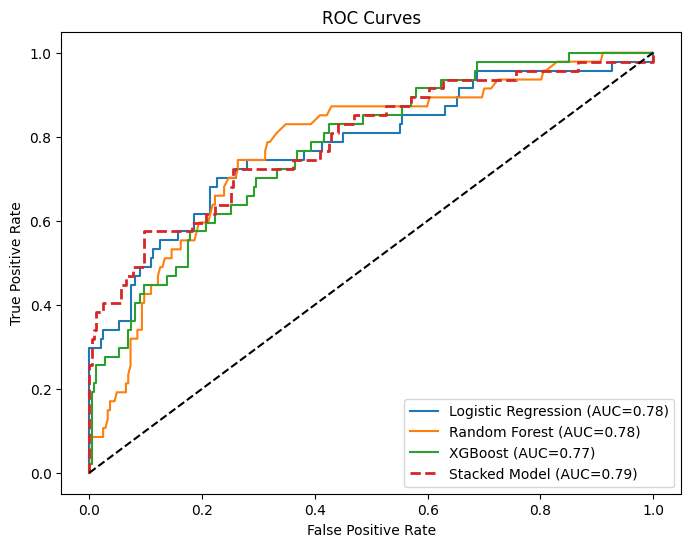

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8,6))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

# Add stacked model too
y_proba_stack = stacked_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
auc = roc_auc_score(y_test, y_proba_stack)
plt.plot(fpr, tpr, label=f"Stacked Model (AUC={auc:.2f})", linestyle="--", linewidth=2)

plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


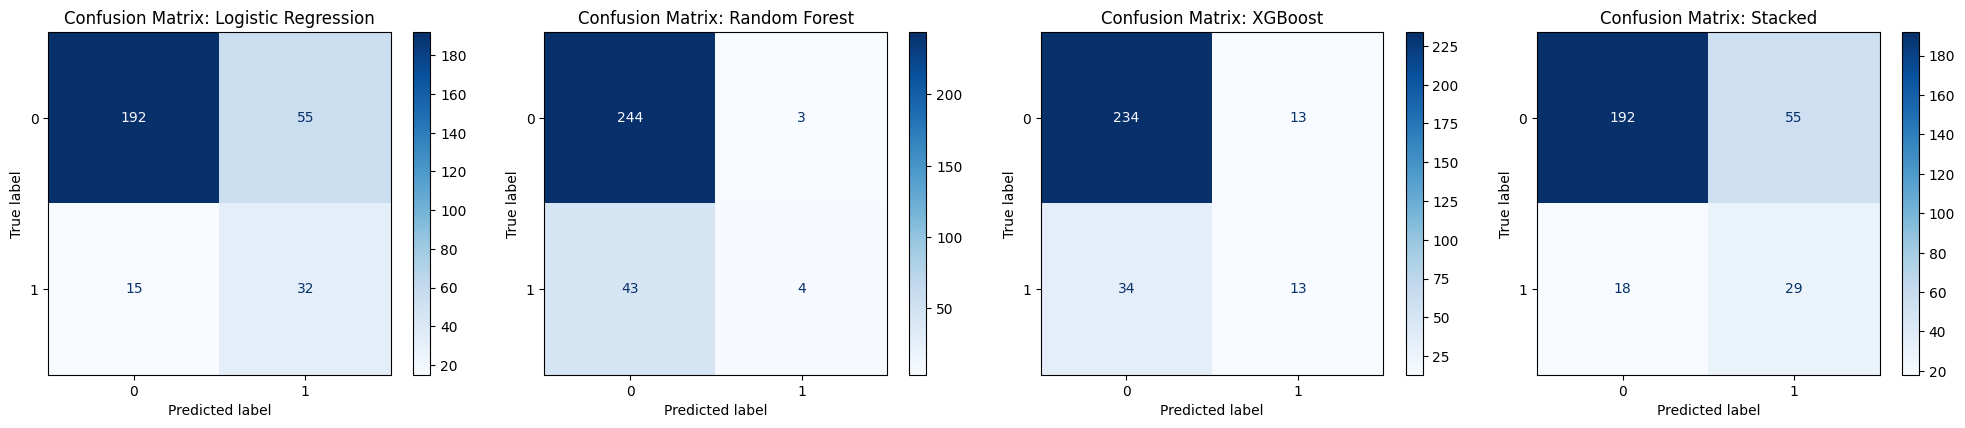

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models_to_plot = {**best_models, "Stacked": stacked_model}
n_models = len(models_to_plot)
n_cols = min(n_models, 4)  # Limit to a maximum of 4 columns for better visualization
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, (name, model) in enumerate(models_to_plot.items()):
    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, cmap="Blues", values_format="d", ax=axes[i]
    )
    axes[i].set_title(f"Confusion Matrix: {name}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
import gradio as gr
from PIL import Image
import pandas as pd

# Functions to load images + insights
def show_heatmap():
    image = Image.open("/content/heat map.png")
    insights = "🔵 Heatmap Insight: Shows correlations between employee features."
    return image, insights

def show_confusion():
    image = Image.open("/content/confusion_matrix.png")
    insights = "🟢 Confusion Matrix Insight: Model predicts well for non-attrition cases."
    return image, insights

def show_roc():
    image = Image.open("/content/roc curve.png")
    insights = "🟡 ROC Curve Insight: AUC close to 0.9 indicates strong performance."
    return image, insights

def show_histogram():
    image = Image.open("/content/histograms.png")
    insights = "🔴 Histogram Insight: Younger employees (<2 years) show higher attrition."
    return image, insights

def show_perfomance_metrics():
    image= Image.open("/content/Perfomance Metrics.png")
    insights = " Performance Metrics: XGBoost is best for Accuracy & Precision, while Logistic Regression/Stacked excel in Recall & F1."
    return image, insights

with gr.Blocks(css="""
body {
    background: url('https://images.unsplash.com/photo-1506784983877-45594efa4cbe') no-repeat center center fixed;
    background-size: cover;
}
.gradio-container {
    background: rgba(255, 255, 255, 0.8); /* semi-transparent box */
    border-radius: 12px;
    padding: 20px;
}
""") as demo:

    gr.Markdown("<h1 style='text-align:center;'>📊 Employee Insights & Prediction Dashboard</h1>")
    gr.Markdown("<h3 style='text-align:center;'>Select a plot or performance table to view along with key insights</h3>")

    with gr.Row():
        btn1 = gr.Button("Heatmap")
        btn2 = gr.Button("Confusion Matrix")
        btn3 = gr.Button("ROC Curve")
        btn4 = gr.Button("Histograms")
        btn5 = gr.Button("Performance Metrics")

    output_img = gr.Image(type="pil", label="Selected Plot", show_label=True)
    output_table = gr.Dataframe(label="Performance Metrics", visible=False)
    output_text = gr.Textbox(label="Insights", lines=4)

    # Button actions
    btn1.click(fn=show_heatmap, inputs=None, outputs=[output_img, output_text])
    btn2.click(fn=show_confusion, inputs=None, outputs=[output_img, output_text])
    btn3.click(fn=show_roc, inputs=None, outputs=[output_img, output_text])
    btn4.click(fn=show_histogram, inputs=None, outputs=[output_img, output_text])
    btn5.click(fn=show_perfomance_metrics, inputs=None,outputs=[output_img, output_text])

demo.launch(share=True)




Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://18a11eb8519049e6bb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
import gradio as gr
import pandas as pd

# Example data (replace with your real X_test, y_proba, y_test)
X_test = pd.DataFrame({
    'emp_id': range(1, 21),
    'feature1': range(20)
})
y_proba = pd.Series([0.1, 0.9, 0.4, 0.7, 0.3, 0.8, 0.2, 0.95, 0.5, 0.6, 0.85, 0.15, 0.45, 0.55, 0.05, 0.75, 0.65, 0.35, 0.25, 0.99])
y_test = pd.Series([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

def show_top_attrition(threshold: float):
    comparison = X_test.copy()
    comparison['attrition_prob'] = y_proba
    comparison['high_risk'] = (comparison['attrition_prob'] > threshold).astype(int)
    comparison['actual_attrition'] = y_test.values

    top_comparison = comparison.sort_values(by='attrition_prob', ascending=False).head(10)
    return top_comparison[['emp_id', 'attrition_prob', 'high_risk', 'actual_attrition']]

iface = gr.Interface(
    fn=show_top_attrition,
    inputs=gr.Slider(0, 1, step=0.05, label="Threshold"),
    outputs=gr.Dataframe(type="pandas", label="Top 10 Attrition Predictions"),
    title="Attrition Risk Viewer",
    description="Adjust the threshold to view the top 10 employees with highest predicted attrition risk."
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f2c285c34c5d728d46.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Job satisfaction

In [71]:
import pandas as pd
ds=pd.read_csv('/content/job satisfaction.csv')

# Create the satisfaction_sum column after loading the CSV
ds['satisfaction_sum'] = ds['env_sat'] + ds['relation_sat']
ds.drop(['env_sat', 'relation_sat'], axis=1, inplace=True)

display(ds.head())

,age,attrition,daily_rate,distance,education,emp_count,emp_id,gender,hourly_rate,job_involve,...,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,edu_field_Life Sciences,edu_field_Marketing,edu_field_Medical,edu_field_Other,edu_field_Technical Degree,satisfaction_sum
0,41,1,1102,1,2,1,1,1,94,3,...,0,0,1,0,1,0,0,0,0,3
1,49,0,279,8,1,1,2,0,61,2,...,0,1,0,0,1,0,0,0,0,7
2,37,1,1373,2,2,1,4,0,92,2,...,0,0,0,0,0,0,0,1,0,6
3,33,0,1392,3,4,1,5,1,56,3,...,0,1,0,0,1,0,0,0,0,7
4,27,0,591,2,1,1,7,0,40,3,...,0,0,0,0,0,0,1,0,0,5


In [72]:
# Drop 'over_18' and 'emp_count' columns if they exist in the DataFrame
columns_to_drop = ['over_18', 'emp_count','std_hours','hourly_rate']
ds = ds.drop(columns=[col for col in columns_to_drop if col in ds.columns])

print(f"Columns after dropping: {ds.columns.tolist()}")

Columns after dropping: ['age', 'attrition', 'daily_rate', 'distance', 'education', 'emp_id', 'gender', 'hourly_rate', 'job_involve', 'job_level', 'job_sat', 'marital', 'income', 'monthly_rate', 'num_companies', 'overtime', 'salary_hike', 'performance', 'std_hours', 'stock_lvl', 'work_years', 'train_times', 'work_balance', 'yrs_company', 'yrs_role', 'yrs_promo', 'yrs_manager', 'travel_Non-Travel', 'travel_Travel_Frequently', 'travel_Travel_Rarely', 'dept_Human Resources', 'dept_Research & Development', 'dept_Sales', 'job_role_Human Resources', 'job_role_Laboratory Technician', 'job_role_Manager', 'job_role_Manufacturing Director', 'job_role_Research Director', 'job_role_Research Scientist', 'job_role_Sales Executive', 'job_role_Sales Representative', 'edu_field_Life Sciences', 'edu_field_Marketing', 'edu_field_Medical', 'edu_field_Other', 'edu_field_Technical Degree', 'satisfaction_sum']


In [73]:
import pandas as pd

# Identify columns related to educational field
edu_field_cols = [col for col in ds.columns if col.startswith('edu_field_')]

# Drop these columns if they exist in the DataFrame
ds = ds.drop(columns=[col for col in edu_field_cols if col in ds.columns])

print(f"Columns after dropping educational field: {ds.columns.tolist()}")

Columns after dropping educational field: ['age', 'attrition', 'daily_rate', 'distance', 'education', 'emp_id', 'gender', 'hourly_rate', 'job_involve', 'job_level', 'job_sat', 'marital', 'income', 'monthly_rate', 'num_companies', 'overtime', 'salary_hike', 'performance', 'std_hours', 'stock_lvl', 'work_years', 'train_times', 'work_balance', 'yrs_company', 'yrs_role', 'yrs_promo', 'yrs_manager', 'travel_Non-Travel', 'travel_Travel_Frequently', 'travel_Travel_Rarely', 'dept_Human Resources', 'dept_Research & Development', 'dept_Sales', 'job_role_Human Resources', 'job_role_Laboratory Technician', 'job_role_Manager', 'job_role_Manufacturing Director', 'job_role_Research Director', 'job_role_Research Scientist', 'job_role_Sales Executive', 'job_role_Sales Representative', 'satisfaction_sum']


Columns after dropping: ['age', 'attrition', 'distance', 'education', 'emp_id', 'gender', 'job_involve', 'job_level', 'job_sat', 'marital', 'income', 'monthly_rate', 'num_companies', 'overtime', 'salary_hike', 'performance', 'stock_lvl', 'work_years', 'train_times', 'work_balance', 'yrs_company', 'yrs_role', 'yrs_promo', 'yrs_manager', 'travel_Non-Travel', 'travel_Travel_Frequently', 'travel_Travel_Rarely', 'dept_Human Resources', 'dept_Research & Development', 'dept_Sales', 'job_role_Human Resources', 'job_role_Laboratory Technician', 'job_role_Manager', 'job_role_Manufacturing Director', 'job_role_Research Director', 'job_role_Research Scientist', 'job_role_Sales Executive', 'job_role_Sales Representative', 'satisfaction_sum']
(1470, 39)


In [85]:
import pandas as pd

# Assuming 'ds' DataFrame is available and contains 'performance' column

# Get all columns except 'performance' and 'emp_id' (assuming 'emp_id' is an identifier)
columns_to_group = [col for col in ds.columns if col not in ['performance', 'emp_id']]

print("Average Performance by Feature:")

# Iterate through each column and group by it
for col in columns_to_group:
    if col in ds.columns and 'performance' in ds.columns:
        # Group by the current column and calculate the mean of 'performance'
        performance_by_group = ds.groupby(col)['performance'].mean().reset_index()
        print(f"\n--- Grouped by: {col} ---")
        display(performance_by_group)
    else:
        print(f"\nSkipping column '{col}' or 'performance' not found.")

Average Performance by Feature:

--- Grouped by: age ---


,age,performance
0,18,3.000000
1,19,3.444444
2,20,3.000000
3,21,3.153846
4,22,3.250000
5,23,3.214286
6,24,3.115385
7,25,3.115385
8,26,3.256410
9,27,3.104167



--- Grouped by: attrition ---


,attrition,performance
0,0,3.153285
1,1,3.156118



--- Grouped by: distance ---


,distance,performance
0,1,3.173077
1,2,3.151659
2,3,3.130952
3,4,3.109375
4,5,3.061538
5,6,3.169492
6,7,3.190476
7,8,3.137500
8,9,3.200000
9,10,3.162791



--- Grouped by: education ---


,education,performance
0,1,3.176471
1,2,3.170213
2,3,3.143357
3,4,3.143216
4,5,3.187500



--- Grouped by: gender ---


,gender,performance
0,0,3.149660
1,1,3.159864



--- Grouped by: job_involve ---


,job_involve,performance
0,1,3.204819
1,2,3.154667
2,3,3.150922
3,4,3.138889



--- Grouped by: job_level ---


,job_level,performance
0,1,3.162063
1,2,3.149813
2,3,3.151376
3,4,3.169811
4,5,3.101449



--- Grouped by: job_sat ---


,job_sat,performance
0,1,3.166090
1,2,3.153571
2,3,3.126697
3,4,3.172113



--- Grouped by: marital ---


,marital,performance
0,0,3.157504
1,1,3.150565



--- Grouped by: income ---


,income,performance
0,1009,3.0
1,1051,3.0
2,1052,4.0
3,1081,3.0
4,1091,3.0
...,...,...
1344,19859,3.0
1345,19926,3.0
1346,19943,3.0
1347,19973,4.0



--- Grouped by: monthly_rate ---


,monthly_rate,performance
0,2094,3.0
1,2097,3.0
2,2104,3.0
3,2112,3.0
4,2122,3.0
...,...,...
1422,26956,3.0
1423,26959,3.0
1424,26968,4.0
1425,26997,3.0



--- Grouped by: num_companies ---


,num_companies,performance
0,0,3.137056
1,1,3.168906
2,2,3.116438
3,3,3.176101
4,4,3.172662
5,5,3.142857
6,6,3.128571
7,7,3.108108
8,8,3.224490
9,9,3.096154



--- Grouped by: overtime ---


,overtime,performance
0,0,3.152751
1,1,3.156250



--- Grouped by: salary_hike ---


,salary_hike,performance
0,11,3.0
1,12,3.0
2,13,3.0
3,14,3.0
4,15,3.0
5,16,3.0
6,17,3.0
7,18,3.0
8,19,3.0
9,20,4.0



--- Grouped by: stock_lvl ---


,stock_lvl,performance
0,0,3.144216
1,1,3.169463
2,2,3.139241
3,3,3.141176



--- Grouped by: work_years ---


,work_years,performance
0,0,3.000000
1,1,3.197531
2,2,3.096774
3,3,3.190476
4,4,3.111111
5,5,3.136364
6,6,3.120000
7,7,3.197531
8,8,3.165049
9,9,3.156250



--- Grouped by: train_times ---


,train_times,performance
0,0,3.185185
1,1,3.126761
2,2,3.162706
3,3,3.150713
4,4,3.130081
5,5,3.159664
6,6,3.138462



--- Grouped by: work_balance ---


,work_balance,performance
0,1,3.175000
1,2,3.139535
2,3,3.157895
3,4,3.150327



--- Grouped by: yrs_company ---


,yrs_company,performance
0,0,3.159091
1,1,3.169591
2,2,3.086614
3,3,3.156250
4,4,3.136364
5,5,3.183673
6,6,3.144737
7,7,3.100000
8,8,3.162500
9,9,3.195122



--- Grouped by: yrs_role ---


,yrs_role,performance
0,0,3.159836
1,1,3.122807
2,2,3.123656
3,3,3.155556
4,4,3.182692
5,5,3.277778
6,6,3.135135
7,7,3.144144
8,8,3.168539
9,9,3.164179



--- Grouped by: yrs_promo ---


,yrs_promo,performance
0,0,3.165232
1,1,3.134454
2,2,3.125786
3,3,3.153846
4,4,3.131148
5,5,3.244444
6,6,3.125000
7,7,3.144737
8,8,3.222222
9,9,3.000000



--- Grouped by: yrs_manager ---


,yrs_manager,performance
0,0,3.171103
1,1,3.118421
2,2,3.119186
3,3,3.126761
4,4,3.214286
5,5,3.161290
6,6,3.103448
7,7,3.166667
8,8,3.214953
9,9,3.156250



--- Grouped by: travel_Non-Travel ---


,travel_Non-Travel,performance
0,0,3.151515
1,1,3.173333



--- Grouped by: travel_Travel_Frequently ---


,travel_Travel_Frequently,performance
0,0,3.150880
1,1,3.166065



--- Grouped by: travel_Travel_Rarely ---


,travel_Travel_Rarely,performance
0,0,3.168618
1,1,3.147651



--- Grouped by: dept_Human Resources ---


,dept_Human Resources,performance
0,0,3.154229
1,1,3.142857



--- Grouped by: dept_Research & Development ---


,dept_Research & Development,performance
0,0,3.137525
1,1,3.162331



--- Grouped by: dept_Sales ---


,dept_Sales,performance
0,0,3.161133
1,1,3.136771



--- Grouped by: job_role_Human Resources ---


,job_role_Human Resources,performance
0,0,3.154443
1,1,3.134615



--- Grouped by: job_role_Laboratory Technician ---


,job_role_Laboratory Technician,performance
0,0,3.151941
1,1,3.162162



--- Grouped by: job_role_Manager ---


,job_role_Manager,performance
0,0,3.150585
1,1,3.196078



--- Grouped by: job_role_Manufacturing Director ---


,job_role_Manufacturing Director,performance
0,0,3.150189
1,1,3.186207



--- Grouped by: job_role_Research Director ---


,job_role_Research Director,performance
0,0,3.156835
1,1,3.100000



--- Grouped by: job_role_Research Scientist ---


,job_role_Research Scientist,performance
0,0,3.150255
1,1,3.167808



--- Grouped by: job_role_Sales Executive ---


,job_role_Sales Executive,performance
0,0,3.161713
1,1,3.125767



--- Grouped by: job_role_Sales Representative ---


,job_role_Sales Representative,performance
0,0,3.154290
1,1,3.144578



--- Grouped by: satisfaction_sum ---


,satisfaction_sum,performance
0,2,3.155172
1,3,3.183486
2,4,3.189655
3,5,3.147059
4,6,3.151057
5,7,3.130112
6,8,3.137405


--- Linear Regression Results ---
MSE: 0.0000
MAE: 0.0000
R²: 1.0000

Comparison (First 10) - Linear Regression:


,Actual,Predicted
0,3,3.0
1,4,4.0
2,3,3.0
3,3,3.0
4,3,3.0
5,3,3.0
6,3,3.0
7,3,3.0
8,3,3.0
9,3,3.0


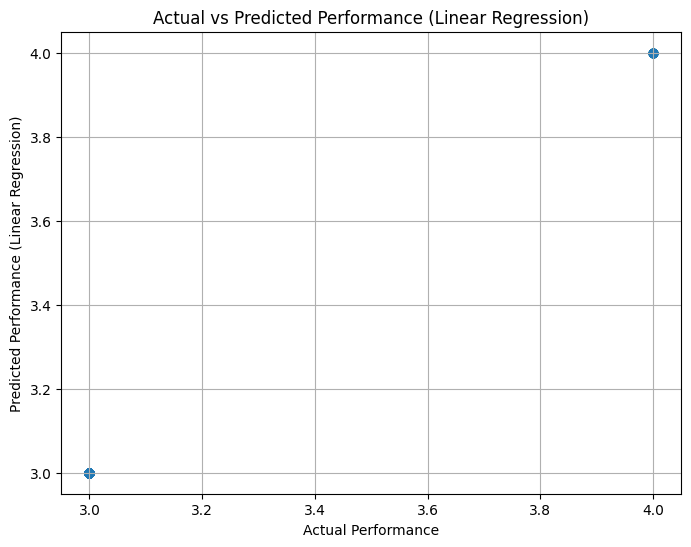

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor # Added Gradient Boosting
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare features and target from ds (predicting 'performance')
# Updated features list to include requested columns
features = ['age', 'attrition', 'distance', 'education', 'emp_id', 'gender', 'job_involve', 'job_level', 'job_sat', 'marital', 'income', 'monthly_rate', 'num_companies', 'overtime', 'salary_hike', 'performance',  'stock_lvl', 'work_years', 'train_times', 'work_balance', 'yrs_company', 'yrs_role', 'yrs_promo', 'yrs_manager', 'travel_Non-Travel', 'travel_Travel_Frequently', 'travel_Travel_Rarely', 'dept_Human Resources', 'dept_Research & Development', 'dept_Sales', 'job_role_Human Resources', 'job_role_Laboratory Technician', 'job_role_Manager', 'job_role_Manufacturing Director', 'job_role_Research Director', 'job_role_Research Scientist', 'job_role_Sales Executive', 'job_role_Sales Representative', 'satisfaction_sum']
target = "performance"

X = ds[features]
y = ds[target]

# Train-test split with stratification
# Check if there are enough samples for stratification for the target variable
if len(y.unique()) > 1 and all(y.value_counts() > 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
else:
     print("Warning: Not enough samples for stratification. Performing train/test split without stratification.")
     X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Linear Regression Model ---
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict and evaluate Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)
print("--- Linear Regression Results ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_linear):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear):.4f}")
print(f"R²: {r2_score(y_test, y_pred_linear):.4f}")

# Comparison table (first 10)
comparison_linear = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_linear}).reset_index(drop=True)
print("\nComparison (First 10) - Linear Regression:")
display(comparison_linear.head(10))

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance (Linear Regression)")
plt.title("Actual vs Predicted Performance (Linear Regression)")
plt.grid(True)
plt.show()

In [97]:
import pandas as pd

# Assuming X_test, y_test, and y_pred_linear are available from cell a439ca3e

# Create a DataFrame with Employee ID, Actual Performance, and Predicted Performance
performance_comparison_with_id = pd.DataFrame({
    "Employee ID": X_test['emp_id'],
    "Actual Performance": y_test,
    "Predicted Performance (Linear Regression)": y_pred_linear
}).reset_index(drop=True)

# Display the DataFrame
print("Actual vs Predicted Performance with Employee ID (Linear Regression Test Set):")
display(performance_comparison_with_id)

Actual vs Predicted Performance with Employee ID (Linear Regression Test Set):


,Employee ID,Actual Performance,Predicted Performance (Linear Regression)
0,529,3,3.0
1,680,4,4.0
2,267,3,3.0
3,1032,3,3.0
4,282,3,3.0
...,...,...,...
289,238,3,3.0
290,32,3,3.0
291,1052,3,3.0
292,647,3,3.0


In [98]:
import pandas as pd
import gradio as gr

# Assuming X_test, y_test, and y_pred_linear are already available
performance_comparison_with_id = pd.DataFrame({
    "Employee ID": X_test['emp_id'].values,
    "Actual Performance": y_test.values,
    "Predicted Performance (Linear Regression)": y_pred_linear
}).reset_index(drop=True)

# Define lookup function
def get_employee_performance(emp_id):
    result = performance_comparison_with_id[
        performance_comparison_with_id["Employee ID"] == emp_id
    ]
    if result.empty:
        return pd.DataFrame({"Message": [f"Employee ID {emp_id} not found in test set."]})
    return result

# Build Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🔎 Employee Performance Lookup (Linear Regression)")
    emp_id_input = gr.Number(label="Enter Employee ID")
    output = gr.Dataframe(label="Actual vs Predicted Performance", interactive=False)
    search_btn = gr.Button("Search")

    search_btn.click(fn=get_employee_performance, inputs=emp_id_input, outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b4626557c1546a2563.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
